# Multi-class Classification using Convolutional Neural Networks

Keras is used as a framework for the convolutional model.

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
### imports ###
import keras
import network
from read_data import readHDF
from load_quilt_data import load_data
from visualise_data import plot_confusion_matrix, plot_wrongs
from pylab import *
import numpy as np

### Read the data from the hdf data set

This data set includes all the 4000 samples (80% training, 20% test data) and the multi class labels.

In [4]:
path = "D:\\ParkHere\\Machine_Learning_scripts\\ANNs\\081118_multi_class_data.h5"
x_train, y_train, x_test, y_test = readHDF(path)

x train:  (3259, 61, 4) y train:  (3259, 4) x test:  (814, 61, 4) y test:  (814, 4)


In [20]:
x_train[2000]

array([[ 0.        ,  1.        ,  1.        ,  1.        ],
       [ 0.01147873,  1.        ,  2.        ,  1.        ],
       [ 0.02363268,  1.        ,  6.        ,  1.        ],
       [ 0.03443619,  1.        ,  0.        ,  1.        ],
       [ 0.04794058,  1.        ,  7.        ,  1.        ],
       [ 0.05941931,  1.        ,  1.        ,  0.        ],
       [ 0.07022282,  1.        ,  2.        ,  0.        ],
       [ 0.08170155,  1.        ,  0.        ,  0.        ],
       [ 0.09318028,  1.        ,  6.        ,  0.        ],
       [ 0.10465901,  0.        ,  1.        ,  1.        ],
       [ 0.1215395 ,  1.        ,  7.        ,  0.        ],
       [ 0.13301823,  0.        ,  6.        ,  1.        ],
       [ 0.14449696,  0.        ,  0.        ,  1.        ],
       [ 0.15597569,  0.        ,  7.        ,  1.        ],
       [ 0.16745442,  0.        ,  0.        ,  0.        ],
       [ 0.17893315,  0.        ,  1.        ,  0.        ],
       [ 0.19041188,  0.

## Training
### Set Hyperparameters and execute model

The summary of the network parameters and the model architecture is printed.

 Activation: sigmoid, Optimizer: <keras.optimizers.Adam object at 0x000002DA34F3CEB8>, Batch size: 20 Stops at 50 epochs, if no minimum improvement of: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 61, 10)            290       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 30, 10)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 30, 20)            1420      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 15, 20)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 15, 40)            5640      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 7, 40)            

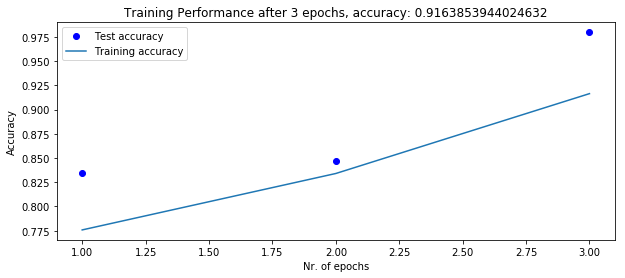

'Done'

In [16]:
sgd = keras.optimizers.SGD(lr=0.01)
adam = keras.optimizers.Adam()
batchsize = 20
epochs = 3
optimizer = adam
activation = 'sigmoid'
minDelta = 0
patience = 50
modelPath = 'D:\\ParkHere\\Keras_models\\model_'+'multi_class'+'_test.h5'

print ( ' Activation: '+activation+ ', Optimizer: '+str(optimizer)+
        ', Batch size: '+ str(batchsize)+' Stops at '+
       str(patience) + ' epochs, if no minimum improvement of: ' + str(minDelta))

Network = network.Net(batchsize, epochs, optimizer, activation, minDelta, patience)
Network.exeModel(x_train, x_test, y_train, y_test, modelPath)

## Evaluation
### Plot confusion matrix and a wrong sample of interest

Confusion matrix: shows the distribution of the results.
One of the wrong samples can be plotted for further analysis.

The data is plotted accordingly:
+ x: time in ms
+ y: segment in 1/3m
+ subplot top: sensor strip 0
+ subplot bottom: sensor strip 1
+ filled data points: push
+ unfilled data points: release of sensor
+ colors according to cluster

Confusion matrix, without normalization


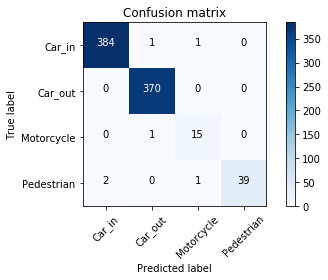

Amount of wrong samples: 6


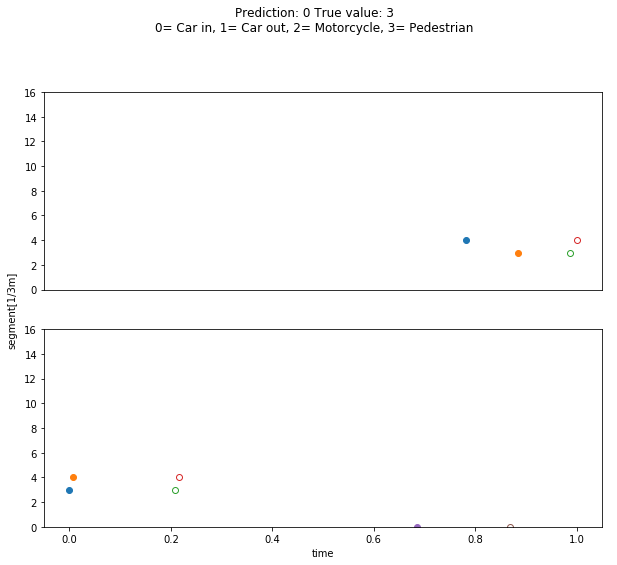

In [17]:
sample = 4
model = 'D:\\ParkHere\\Keras_models\\model_'+'multi_class'+'.h5'
plot_wrongs(sample, x_test, y_test, model)